# Iris

> 주제
- 붓꽃의 종류, 꽃받침, 꽃잎의 길이를 이용해 꽃받침의 너비와 꽃잎의 너비를 예측
- 기존 너비와 길이가 모두 주어지고 붓꽃의 종류를 예측하는 문제랑은 조금 다름

> 평가
- 평가 산식 : MAE (Mean Absolute Error)
- public score : 전체 테스트 데이터 중 40%
- private score : 전체 테스트 데이터 중 60%

In [13]:
# 데이콘 측에서 제공한 평가 지표
import numpy as np

def MAE(true, pred):
    score = np.mean(np.abs(true-pred))
    return score

## Data

In [48]:
import os
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

In [38]:
cwd = os.getcwd()
print('Current Working Directory: ', cwd)

Current Working Directory:  C:\Users\User\Desktop\workspace\DACON\Iris


In [39]:
iris_path = os.path.join(cwd, 'data', 'iris_train.csv')
iris_df = pd.read_csv(iris_path)

# Correlation

## species
> 상관성
- sepal length (cm) 와 petal length (cm)는 상관관계가 있음이 보인다.
- sepal length (cm) 와 sepal width (cm)는 [setosa]와 [versicolor, virginica]으로 어서 상관관계를 보아야 할 것 같다.
- petal length (cm) 와 petal width (cm)도 상관관계가 있음이 보인다.

> setosa | nonsetosa
- 품종을 분리하기 전에 나타났던 상관계수 0.027104에 비하면 상관성이 명확히 드러난 것 같다.

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

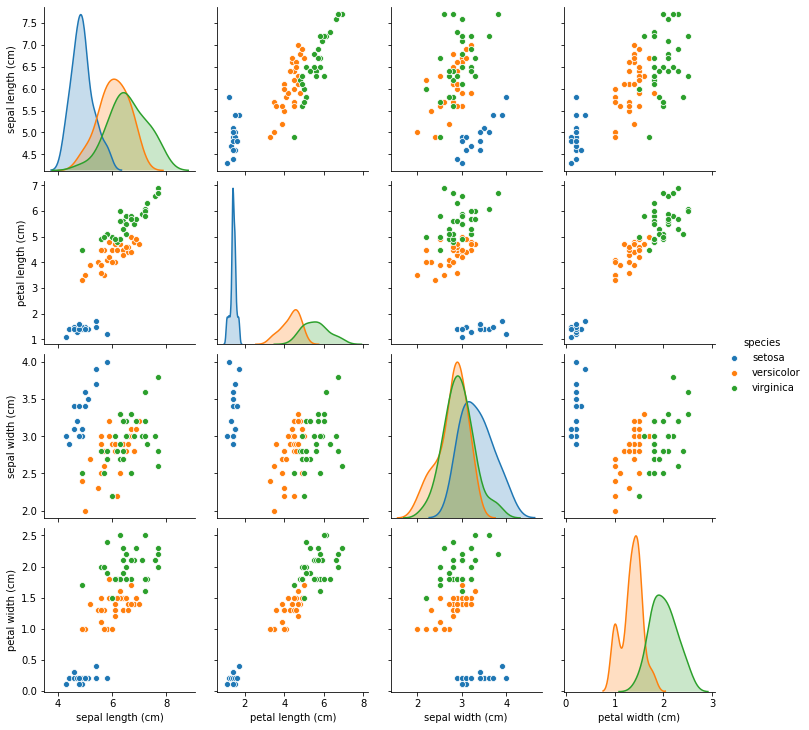

In [49]:
features = ['species','sepal length (cm)','petal length (cm)', 'sepal width (cm)', 'petal width (cm)']
sns.pairplot(iris_df[features], hue='species')

In [50]:
sepal_width_relation = iris_df[['sepal length (cm)','petal length (cm)','sepal width (cm)', 'petal width (cm)']]
sepal_width_relation.corr(method='pearson')

,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
sepal length (cm),1.000000,0.864852,0.027104,0.763597
petal length (cm),0.864852,1.000000,-0.274590,0.953549
sepal width (cm),0.027104,-0.274590,1.000000,-0.217103
petal width (cm),0.763597,0.953549,-0.217103,1.000000


In [51]:
setosa_iris_df = iris_df[iris_df.species == 'setosa'].reset_index(drop=True) # setosa
nonsetosa_iris_df = iris_df[iris_df.species != 'setosa'].reset_index(drop=True) # setosa가 아닌

In [52]:
# 품종이 setosa
setosa_sepal_width_relation = setosa_iris_df[['sepal length (cm)','petal length (cm)','sepal width (cm)', 'petal width (cm)']]
setosa_sepal_width_relation.corr(method='pearson')

,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
sepal length (cm),1.000000,0.214368,0.861071,0.332405
petal length (cm),0.214368,1.000000,0.219777,0.512989
sepal width (cm),0.861071,0.219777,1.000000,0.576726
petal width (cm),0.332405,0.512989,0.576726,1.000000


In [53]:
# 품종이 setosa 아닌
nonsetosa_sepal_width_relation = nonsetosa_iris_df[['sepal length (cm)','petal length (cm)','sepal width (cm)', 'petal width (cm)']]
nonsetosa_sepal_width_relation.corr(method='pearson')

,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
sepal length (cm),1.000000,0.807099,0.544904,0.500012
petal length (cm),0.807099,1.000000,0.464062,0.817847
sepal width (cm),0.544904,0.464062,1.000000,0.506280
petal width (cm),0.500012,0.817847,0.506280,1.000000


# EDA
- species : 종류
- sepal length (cm) : 꽃받침 길이
- petal length (cm) : 꽃잎 길이
- sepal width (cm) : 꽂받침 너비
- petal width (cm): 꽃잎 너비

In [40]:
iris_df.head()

,id,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,0,setosa,4.4,1.4,2.9,0.2
1,1,versicolor,6.4,4.5,3.2,1.5
2,2,virginica,6.2,4.8,2.8,1.8
3,3,virginica,7.2,6.1,3.6,2.5
4,4,setosa,4.9,1.4,3.0,0.2


In [41]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 75 non-null     int64  
 1   species            75 non-null     object 
 2   sepal length (cm)  75 non-null     float64
 3   petal length (cm)  75 non-null     float64
 4   sepal width (cm)   75 non-null     float64
 5   petal width (cm)   75 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB


In [42]:
iris_df.describe()

,id,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,37.000000,6.044000,4.258667,2.958667,1.384000
std,21.794495,0.842653,1.615390,0.388376,0.697106
min,0.000000,4.300000,1.100000,2.000000,0.100000
25%,18.500000,5.550000,3.750000,2.800000,1.000000
50%,37.000000,6.100000,4.700000,3.000000,1.500000
75%,55.500000,6.600000,5.300000,3.200000,1.850000
max,74.000000,7.700000,6.900000,4.000000,2.500000


In [43]:
iris_df['species'].value_counts()

virginica     30
versicolor    30
setosa        15
Name: species, dtype: int64

# Modeling

## Linear Regression

In [74]:
# 품종별로 차이를 보이므로 품종별로 나누어서 선형함수 도출
setosa_df = iris_df[iris_df.species == 'setosa'].copy().reset_index(drop=True)
non_setosa_df = iris_df[iris_df.species != 'setosa'].copy().reset_index(drop=True)

In [75]:
setosa_df

,id,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,0,setosa,4.4,1.4,2.9,0.2
1,4,setosa,4.9,1.4,3.0,0.2
2,6,setosa,4.3,1.1,3.0,0.1
3,13,setosa,4.6,1.5,3.1,0.2
4,14,setosa,5.8,1.2,4.0,0.2
5,18,setosa,5.1,1.4,3.5,0.2
6,21,setosa,5.4,1.7,3.9,0.4
7,31,setosa,5.0,1.5,3.4,0.2
8,37,setosa,4.9,1.5,3.1,0.1
9,43,setosa,4.7,1.3,3.2,0.2


### torch
- 선형함수 (Y = aX + b)를 만들건데, 혹시 나중에 neural network으로 수정하고 싶을 때를 대비하여 
-  여기서는 torch library를 사용한다.


In [77]:
import numpy as np
import torch
from torch import nn, optim
from torch.autograd import Variable

In [79]:
def MAE(label, pred):
    score = torch.mean(torch.abs(label - pred))
    return score

In [80]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)  # Y = aX + b

    def forward(self, x):
        out = self.linear(x)
        return out

위에서 상관계수를 구했을 때, setosa 이외의 품종에서는 sepal length 뿐 아니라 petal length도 상관관계가 어느정도 있는 것으로 보였기에 
두 특성을 모두 사용하여 sepal width를 구하는 선형함수를 도출

#### sepal width - setosa

In [81]:
septal_width_features = ['sepal length (cm)', 'petal length (cm)']

In [83]:
# 모델 객체 생성
inputDim = len(septal_width_features)
outputDim = 1
model = linearRegression(inputDim, outputDim)

In [84]:
# 혹시 GPU 가 지원되는 환경이면 GPU로 넘겨서 연산할 수 있도록 해 줌
if torch.cuda.is_available():
    model.cuda()

In [85]:
model

linearRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [86]:
learningRate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

- torch를 사용하려면 데이터들이 tensor형식이어야 하므로 현재 DataFrame 형식인 setosa_df를 일단 numpy.array 형식으로 변환한다.
- numpy.array 형식으로 변환하는 이유는, 나중에 학습 단계에서 torch.tensor 형으로 쉽게 변환하기 위해서이다.

In [87]:
setosa_features = np.array(setosa_df[septal_width_features].copy(), dtype=np.float32).reshape(-1,2)
setosa_labels = np.array(setosa_df['sepal width (cm)'].copy(), dtype=np.float32).reshape(-1,1)

In [89]:
# 학습회수를 3000번으로 충분히 주고, 200회 학습할 때마다 한번씩 loss와 weights, bias값을 출력.
epochs =3000

In [91]:
for epoch in range(epochs):
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(setosa_features).cuda())
        labels = Variable(torch.from_numpy(setosa_labels).cuda())
    else:
        inputs = Variable(torch.from_numpy(setosa_features))
        labels = Variable(torch.from_numpy(setosa_labels))

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = MAE(labels, outputs)

    loss.backward()

    optimizer.step()
    
    if epoch % 200 == 0 or epoch == epochs - 1:
        print("epoch {}, loss {}".format(epoch, loss.item()))
        weight = model.state_dict()['linear.weight'].data[0]
        bias = model.state_dict()['linear.bias'].data[0]
        print("weight {}, bias {}".format(weight, bias))

epoch 0, loss 0.12549184262752533
weight tensor([ 0.7286, -0.0404]), bias -0.17267248034477234
epoch 200, loss 0.12572361528873444
weight tensor([ 0.7330, -0.0475]), bias -0.1839234083890915
epoch 400, loss 0.12601463496685028
weight tensor([ 0.7304, -0.0448]), bias -0.1783013790845871
epoch 600, loss 0.1250547617673874
weight tensor([ 0.7309, -0.0465]), bias -0.18088115751743317
epoch 800, loss 0.12432427704334259
weight tensor([ 0.7294, -0.0415]), bias -0.1774291694164276
epoch 1000, loss 0.12452170252799988
weight tensor([ 0.7336, -0.0454]), bias -0.1831405609846115
epoch 1200, loss 0.12437545508146286
weight tensor([ 0.7292, -0.0394]), bias -0.17530764639377594
epoch 1400, loss 0.12443388253450394
weight tensor([ 0.7286, -0.0417]), bias -0.17218895256519318
epoch 1600, loss 0.12477727234363556
weight tensor([ 0.7276, -0.0374]), bias -0.17325443029403687
epoch 1800, loss 0.1247246116399765
weight tensor([ 0.7285, -0.0419]), bias -0.1732422560453415
epoch 2000, loss 0.124875530600547

In [92]:
print("loss {}".format(loss.item()))
weight = model.state_dict()['linear.weight'].data[0]
bias = model.state_dict()['linear.bias'].data[0]
print("setosa final weight {}, bias {}".format(weight, bias))

loss 0.12441525608301163
setosa final weight tensor([ 0.7297, -0.0420]), bias -0.1771140992641449


setosa 품종에 대한 sepal width를 구하는 선형함수
- sepalwidth(Y)=0.7269∗sepallength(cm)+−0.0398∗petalwidth(cm)−0.17793

#### sepal width - nonsetosa
- setosa 품종에 대한 sepal width 선형함수 구하는 방법과 동일하지만 데이터만 setosa 외 품종을 사용

In [93]:
nonsetosa_features = np.array(non_setosa_df[septal_width_features].copy(), dtype=np.float32).reshape(-1,2)
nonsetosa_labels = np.array(non_setosa_df['sepal width (cm)'].copy(), dtype=np.float32).reshape(-1,1)

In [94]:
inputDim = len(septal_width_features) 
outputDim = 1
learningRate = 0.01
epochs =3000

In [95]:
model = linearRegression(inputDim, outputDim)

if torch.cuda.is_available():
    model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

In [97]:
for epoch in range(epochs):
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(nonsetosa_features).cuda())
        labels = Variable(torch.from_numpy(nonsetosa_labels).cuda())
    else:
        inputs = Variable(torch.from_numpy(nonsetosa_features))
        labels = Variable(torch.from_numpy(nonsetosa_labels))
        
    optimizer.zero_grad()

    outputs = model(inputs)

    loss = MAE(labels, outputs)

    loss.backward()

    optimizer.step()
    
    if epoch % 200 == 0 or epoch == epochs - 1:
        print("epoch {}, loss {}".format(epoch, loss.item()))
        weight = model.state_dict()['linear.weight'].data[0]
        bias = model.state_dict()['linear.bias'].data[0]
        print("weight {}, bias {}".format(weight, bias))

epoch 0, loss 0.21293193101882935
weight tensor([0.2629, 0.0299]), bias 1.064395546913147
epoch 200, loss 0.21335825324058533
weight tensor([0.2643, 0.0316]), bias 1.066107153892517
epoch 400, loss 0.21315617859363556
weight tensor([0.2641, 0.0315]), bias 1.065929889678955
epoch 600, loss 0.21288901567459106
weight tensor([0.2630, 0.0303]), bias 1.0648059844970703
epoch 800, loss 0.212948739528656
weight tensor([0.2647, 0.0322]), bias 1.0664620399475098
epoch 1000, loss 0.21305713057518005
weight tensor([0.2655, 0.0308]), bias 1.0685808658599854
epoch 1200, loss 0.21290786564350128
weight tensor([0.2654, 0.0294]), bias 1.063501000404358
epoch 1400, loss 0.21292336285114288
weight tensor([0.2659, 0.0303]), bias 1.0677415132522583
epoch 1600, loss 0.21341289579868317
weight tensor([0.2643, 0.0315]), bias 1.0666035413742065
epoch 1800, loss 0.21303534507751465
weight tensor([0.2664, 0.0287]), bias 1.0647952556610107
epoch 2000, loss 0.21292266249656677
weight tensor([0.2664, 0.0289]), bia

In [98]:
print("loss {}".format(loss.item()))
weight = model.state_dict()['linear.weight'].data[0]
bias = model.state_dict()['linear.bias'].data[0]
print("non setosa final weight {}, bias {}".format(weight, bias))

loss 0.21339866518974304
non setosa final weight tensor([0.2629, 0.0313]), bias 1.0676202774047852


setosa 외 품종에 대한 sepal width를 구하는 선형함수
- sepalwidth(Y)=0.2614∗sepallength(cm)+0.0323∗petalwidth(cm)+1.06714

#### petal width
- petal length 하나만 특성으로 사용
- 사용하는 특성이 1개인 것과 데이터셋을 나누지 않고 iris_df를 그대로 사용하는 것을 제외하면 나머지는 위에서 sepal width 선형함수 도출 방법과 동일

In [99]:
petal_width_features = ['petal length (cm)']
petal_features = np.array(iris_df[petal_width_features].copy(), dtype=np.float32).reshape(-1,1)
petal_labels = np.array(iris_df['petal width (cm)'].copy(), dtype=np.float32).reshape(-1,1)

In [100]:
inputDim = 1  # petal length (cm) 하나만 특성으로 사용
outputDim = 1
learningRate = 0.01
epochs =3000

In [102]:
model = linearRegression(inputDim, outputDim)

if torch.cuda.is_available():
    model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

In [103]:
for epoch in range(epochs):
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(petal_features).cuda())
        labels = Variable(torch.from_numpy(petal_labels).cuda())
    else:
        inputs = Variable(torch.from_numpy(petal_features))
        labels = Variable(torch.from_numpy(petal_labels))

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = MAE(labels, outputs)

    loss.backward()

    optimizer.step()
    
    if epoch % 200 == 0 or epoch == epochs - 1:
        print("epoch {}, loss {}".format(epoch, loss.item()))
        weight = model.state_dict()['linear.weight'].data[0]
        bias = model.state_dict()['linear.bias'].data[0]
        print("petal weight {}, bias {}".format(weight, bias))

epoch 0, loss 0.5938601493835449
petal weight tensor([0.2967]), bias -0.4208143949508667
epoch 200, loss 0.15908119082450867
petal weight tensor([0.4181]), bias -0.38538658618927
epoch 400, loss 0.15915429592132568
petal weight tensor([0.4177]), bias -0.38365477323532104
epoch 600, loss 0.15924641489982605
petal weight tensor([0.4168]), bias -0.3839186429977417
epoch 800, loss 0.15936994552612305
petal weight tensor([0.4193]), bias -0.38727861642837524
epoch 1000, loss 0.15912555158138275
petal weight tensor([0.4182]), bias -0.3859056532382965
epoch 1200, loss 0.15928709506988525
petal weight tensor([0.4172]), bias -0.38505348563194275
epoch 1400, loss 0.15925242006778717
petal weight tensor([0.4185]), bias -0.3861216604709625
epoch 1600, loss 0.15975728631019592
petal weight tensor([0.4147]), bias -0.38558152318000793
epoch 1800, loss 0.1591055542230606
petal weight tensor([0.4181]), bias -0.383539617061615
epoch 2000, loss 0.15933723747730255
petal weight tensor([0.4179]), bias -0.38

In [104]:
print("loss {}".format(loss.item()))
weight = model.state_dict()['linear.weight'].data[0]
bias = model.state_dict()['linear.bias'].data[0]
print("petal final weight {}, bias {}".format(weight, bias))

loss 0.15932080149650574
petal final weight tensor([0.4166]), bias -0.386013001203537


petal width를 구하는 선형함수
- petal width (Y) = 0.4160 * petal width (cm) - 0.383763petalwidth(Y)=0.4160∗petalwidth(cm)−0.383763

# test data

In [105]:
test_path = os.path.join(cwd, 'data', 'iris_test.csv')
test_df = pd.read_csv(test_path)
test_df.head()

,id,species,sepal length (cm),petal length (cm)
0,0,setosa,5.4,1.7
1,1,setosa,5.7,1.5
2,2,setosa,5.3,1.5
3,3,setosa,5.1,1.9
4,4,virginica,6.0,4.8


In [106]:
test_predict_df = test_df.copy()

In [107]:
test_predict_df['sepal width (cm)'] = 0.0
test_predict_df['petal width (cm)'] = 0.0

In [108]:
test_predict_df.head()

,id,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,0,setosa,5.4,1.7,0.0,0.0
1,1,setosa,5.7,1.5,0.0,0.0
2,2,setosa,5.3,1.5,0.0,0.0
3,3,setosa,5.1,1.9,0.0,0.0
4,4,virginica,6.0,4.8,0.0,0.0


In [110]:
# 도출한 petal width 선형함수의 계수들을 변수에 담아 둔다.
ap1 = 0. 
ap2 = 0.4160
bp = -0.38376399874687195

In [112]:
for i in range (75):
    species = test_predict_df.iloc[i]['species']
    if species == 'setosa':
        as1 = 0.7310
        as2 = -0.0473
        bs = -0.17551535367965698
    elif species != 'setosa':
        as1 = 0.2614
        as2 = 0.0323
    bs = 1.0671409368515015

    sepal_length = test_predict_df.iloc[i]['sepal length (cm)']
    petal_length = test_predict_df.iloc[i]['petal length (cm)']

    predict_sepal_width = np.around(as1 * sepal_length + as2 * petal_length + bs, 4)
    predict_petal_width = np.around(ap1 * sepal_length + ap2 * petal_length + bp, 4)

    test_predict_df.at[i, 'sepal width (cm)'] = predict_sepal_width
    test_predict_df.at[i, 'petal width (cm)'] = predict_petal_width

In [113]:
test_predict_df

,id,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,0,setosa,5.4,1.7,4.9341,0.3234
1,1,setosa,5.7,1.5,5.1629,0.2402
2,2,setosa,5.3,1.5,4.8705,0.2402
3,3,setosa,5.1,1.9,4.7054,0.4066
4,4,virginica,6.0,4.8,2.7906,1.6130
...,...,...,...,...,...,...
70,70,versicolor,5.8,4.0,2.7125,1.2802
71,71,setosa,4.4,1.3,4.2221,0.1570
72,72,virginica,6.3,5.6,2.8948,1.9458
73,73,versicolor,5.1,3.0,2.4972,0.8642


# Submission

In [114]:
predict_sepal_width = test_predict_df['sepal width (cm)']
predict_petal_width = test_predict_df['petal width (cm)']

In [116]:
submission_sample_path = os.path.join(cwd, 'data', 'sample_submission.csv')
submission = pd.read_csv(submission_sample_path)

submission['sepal width (cm)'] = predict_sepal_width
submission['petal width (cm)'] = predict_petal_width

In [117]:
submission

,id,sepal width (cm),petal width (cm)
0,0,4.9341,0.3234
1,1,5.1629,0.2402
2,2,4.8705,0.2402
3,3,4.7054,0.4066
4,4,2.7906,1.6130
...,...,...,...
70,70,2.7125,1.2802
71,71,4.2221,0.1570
72,72,2.8948,1.9458
73,73,2.4972,0.8642


In [119]:
submission_path = os.path.join(cwd, 'torch_submission.csv')
submission.to_csv(submission_path, index=False)